In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
df = pd.read_csv("dataset/ecoli.csv", index_col=0)
df.head()

,0,1,2,3,4,5,6,target
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0


In [3]:
X = df.drop(columns=['target'])
X.head()

,0,1,2,3,4,5,6
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


In [4]:
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [5]:
X = X.to_numpy()
y = y.to_numpy()

In [6]:
ms = int(sum(y))
ms

35

In [7]:
ml = len(y) - ms
ml

301

In [8]:
d = np.divide(ms, ml)
d

0.11627906976744186

threshold = sesuai preferensi pengguna biasanya bernilai 1

In [9]:
threshold = 1
if d > threshold:
    print("Tidak ditemui kasus imbalance dataset")
else:
    print("Ditemui kasus imbalance dataset")

Ditemui kasus imbalance dataset


beta = variabel kontrol terhadap hasil sintesis, berjangka 0 hingga 1, menurut Haibo He, adasyn mencapai tingkat keseimbangan sempurna di beta = 1 

In [10]:
beta = 1
G = (ml - ms) * beta
G

266

K = jumlah tetangga terdekat

In [11]:
K = 5
Ri = []
Minority_per_xi = []


clf = KNeighborsClassifier()
clf.fit(X, y)
for i in range(ms):
    xi = X[i, :].reshape(1, -1)
    # Returns indices of the closest neighbours, and return it as a list
    neighbours = clf.kneighbors(xi, n_neighbors=K, return_distance=False)[0]
    # Skip classifying itself as one of its own neighbours
    # neighbours = neighbours[1:]

    # Count how many belongs to the majority class
    count = 0
    for value in neighbours:
        if value > ms:
            count += 1

    Ri.append(count / K)

    # Find all the minority examples
    minority = []
    for value in neighbours:
        # Shifted back 1 because indices start at 0
        if value <= ms - 1:
            minority.append(value)

    Minority_per_xi.append(minority)

In [12]:
pd.DataFrame(neighbours).T

,0,1,2,3,4
0,34,137,70,93,136


In [13]:
Rhat_i = []
for ri in Ri:
    rhat_i = ri / sum(Ri)
    Rhat_i.append(rhat_i)

assert(sum(Rhat_i) > 0.99)

In [14]:
pd.DataFrame(Rhat_i).T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.025424,0.033898,0.033898,0.033898,0.025424,0.025424,0.033898,0.025424,0.016949,0.033898,...,0.025424,0.033898,0.033898,0.025424,0.033898,0.033898,0.025424,0.025424,0.033898,0.033898


In [15]:
Gi = []
for rhat_i in Rhat_i:
    gi = round(rhat_i * G)
    Gi.append(int(gi))

In [16]:
pd.DataFrame(Gi).T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,7,9,9,9,7,7,9,7,5,9,...,7,9,9,7,9,9,7,7,9,9


In [17]:
syn_data = []
for i in range(ms):
    xi = X[i, :].reshape(1, -1)
    for j in range(Gi[i]):
        if Minority_per_xi[i]:
            index = np.random.choice(Minority_per_xi[i])
            xzi = X[index, :].reshape(1, -1)
            si = xi + (xzi - xi) * np.random.uniform(0, 1)
            syn_data.append(si)

data = []
for values in syn_data:
    data.append(values[0])
    
print("{} sampel akan dibangkitkan".format(len(data)))

271 sampel akan dibangkitkan


In [18]:
pd.DataFrame(data)

,0,1,2,3,4,5,6
0,0.478114,0.281510,0.48,0.5,0.561698,0.245094,0.353396
1,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000
2,0.466266,0.273047,0.48,0.5,0.563391,0.250172,0.356781
3,0.449849,0.261321,0.48,0.5,0.565736,0.257208,0.361472
4,0.426040,0.244314,0.48,0.5,0.569137,0.267412,0.368274
...,...,...,...,...,...,...,...
266,0.240000,0.350000,0.48,0.5,0.310000,0.190000,0.310000
267,0.240000,0.350000,0.48,0.5,0.310000,0.190000,0.310000
268,0.240000,0.350000,0.48,0.5,0.310000,0.190000,0.310000
269,0.240000,0.350000,0.48,0.5,0.310000,0.190000,0.310000


Berikan label dari nilai target kelas minoritas dan pasangkan dengan fitur hasil sintesis.

In [19]:
labels = np.ones([len(data), 1])
data = np.concatenate([data,labels], axis=1)
pd.DataFrame(data).head()

,0,1,2,3,4,5,6,7
0,0.478114,0.281510,0.48,0.5,0.561698,0.245094,0.353396,1.0
1,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,1.0
2,0.466266,0.273047,0.48,0.5,0.563391,0.250172,0.356781,1.0
3,0.449849,0.261321,0.48,0.5,0.565736,0.257208,0.361472,1.0
4,0.426040,0.244314,0.48,0.5,0.569137,0.267412,0.368274,1.0


Gabung himpunan data hasil sintesis dengan himpunan data asli

In [20]:
org_data = np.concatenate([X, y.reshape(-1, 1)], axis=1)
data = np.concatenate([data, org_data])
df_generated = pd.DataFrame(data).rename({7:'target'}, axis=1)

In [21]:
import matplotlib.pyplot as plt
from collections import Counter


def histogram(target, title):
    plot = plt.bar(['Majority', 'Minority'], Counter(target).values())
    plot[0].set_color("orange")
    plt.title(title)
    plt.ylabel("Jumlah Instance")
    plt.show()

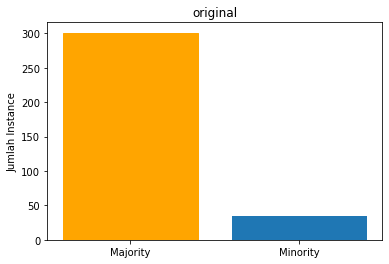

In [22]:
histogram(df['target'], 'original')

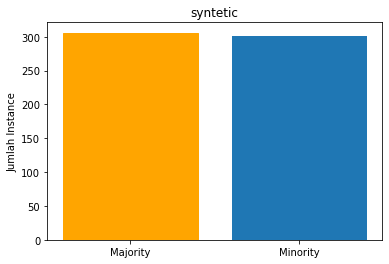

In [23]:
histogram(df_generated['target'], 'syntetic')